In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn .metrics import confusion_matrix,classification_report,accuracy_score


In [2]:
data=pd.read_csv("bill_authentication.csv")

In [3]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
data.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [7]:
import seaborn as sns

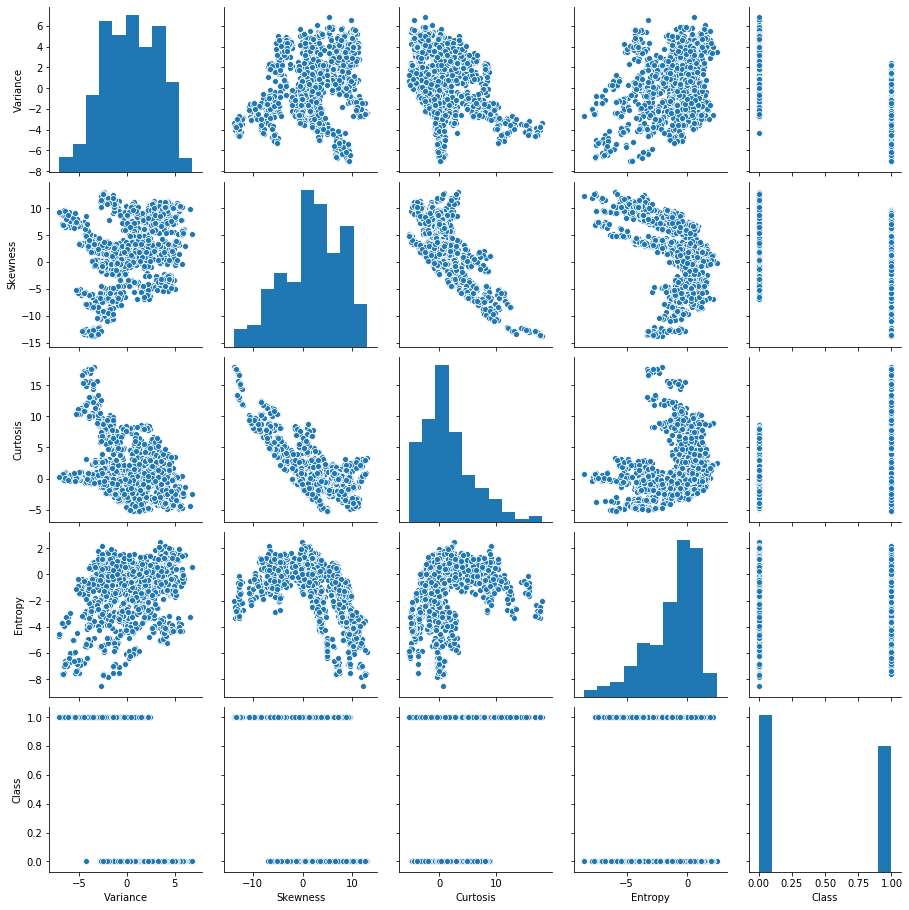

In [8]:
sns.pairplot(data)

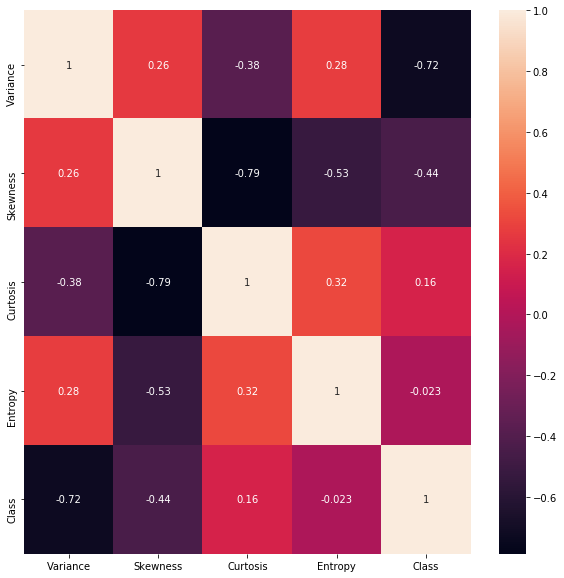

In [9]:
a=data.corr()
b=a.index
plt.figure(figsize=(10,10))
s=sns.heatmap(data[b].corr(),annot=True)

In [10]:

x=data.drop(['Class'],axis=1)
y=data['Class']


In [11]:
x.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.51821585 0.27384094 0.14760805 0.06033516]


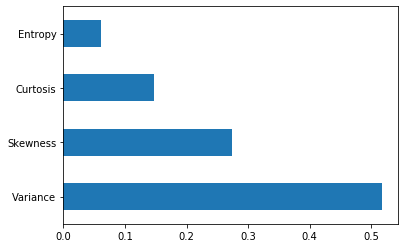

In [15]:
fet=pd.Series(model.feature_importances_,index=x.columns)
fet.nlargest(5).plot(kind='barh')
plt.show()

In [16]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
print(x_train,y_train)

      Variance  Skewness  Curtosis   Entropy
695   0.495710  10.22430  -1.09700 -4.015900
440   3.435900   0.66216   2.10410  1.892200
1359  0.066129   2.49140  -2.94010 -0.621560
1290  0.110320   1.97410  -3.36680 -0.652590
1347 -5.385700   9.12140  -0.41929 -5.918100
...        ...       ...       ...       ...
1192 -4.401800 -12.93710  15.65590 -1.680600
308   4.616000  10.17880  -4.21850 -4.424500
980   0.636550   5.20220  -5.21590 -6.121100
709   3.269200   3.41840   0.20706 -0.066824
227  -2.647900  10.13740  -1.33100 -5.470700

[1234 rows x 4 columns] 695     0
440     0
1359    1
1290    1
1347    1
       ..
1192    1
308     0
980     1
709     0
227     0
Name: Class, Length: 1234, dtype: int64


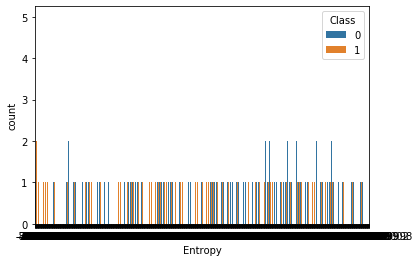

In [21]:
sns.countplot(x='Entropy',hue="Class",data=data)

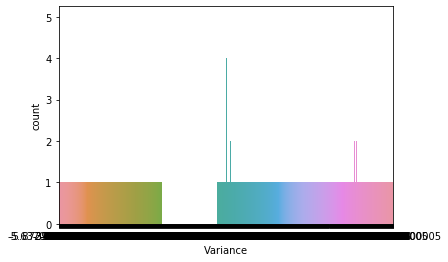

In [19]:
sns.countplot(x="Variance",data=data)

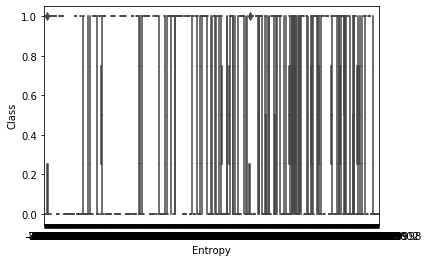

In [25]:
sns.boxplot('Entropy','Class',data=data)

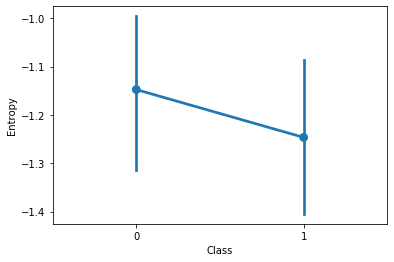

In [23]:
sns.pointplot(data['Class'],data['Entropy'])

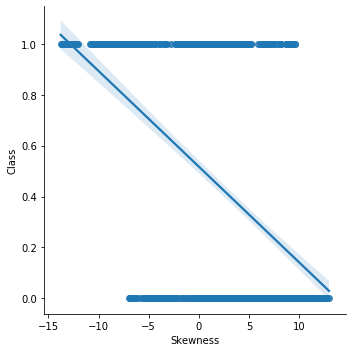

In [28]:
sns.lmplot(x='Skewness',y='Class',data=data)

In [29]:
cls=DecisionTreeClassifier()

cls.fit(x_train,y_train)

pre=cls.predict(x_test)

In [30]:
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0], dtype=int64)

In [31]:
y_test

279     0
104     0
75      0
86      0
373     0
       ..
664     0
393     0
1367    1
1112    1
232     0
Name: Class, Length: 138, dtype: int64

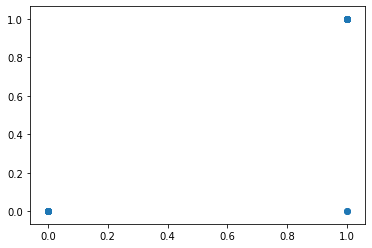

In [33]:
plt.scatter(y_test,pre)

In [34]:
print(sklearn.metrics.accuracy_score(y_test,pre))
print(sklearn.metrics.classification_report(y_test,pre))

0.9855072463768116
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        79
           1       1.00      0.97      0.98        59

    accuracy                           0.99       138
   macro avg       0.99      0.98      0.99       138
weighted avg       0.99      0.99      0.99       138



([<matplotlib.patches.Wedge at 0x15f96b7ff88>,
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(2.097023660910115, 0.11176656737655984, ''),
  Text(2.0732635448154344, 0.3340333422569357, ''),
  Text(1.0751437287074068, 0.2325208864191216, ''),
  Text(1.0751437287074068, 0.2325208864191216, ''),
  Text(1.0751437287074068, 0.2325208864191216, ''),
  Text(1.0751437287074068, 0.2325208864191216, ''),
  Text(1.0751437287074068, 0.2325208864191216, ''),
  Text(2.0260125242364886, 0.5525153858825032, ''),
  Text(1.9558059721189798, 0.7647372093887765, ''),
  Text(1.863439356754474, 0.9682942547069424, ''),
  Text(0.9477094889793287, 0.5584323813126707, ''),
  Text(0.9477094889793287, 0.5584323813126707, ''),
  Text(0.9477094889793287, 0.5584323813126707, ''),
  Text(0.9477094889793287, 0.5584323813126707, ''),
  Text

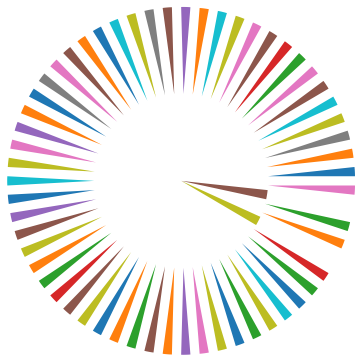

In [36]:
plt.pie(y_test,pre)